In [1]:
from fastai.vision.all import *
import pandas as pd
import cam
import util

In [2]:
dls, labels = util.chexpert_data_loader()

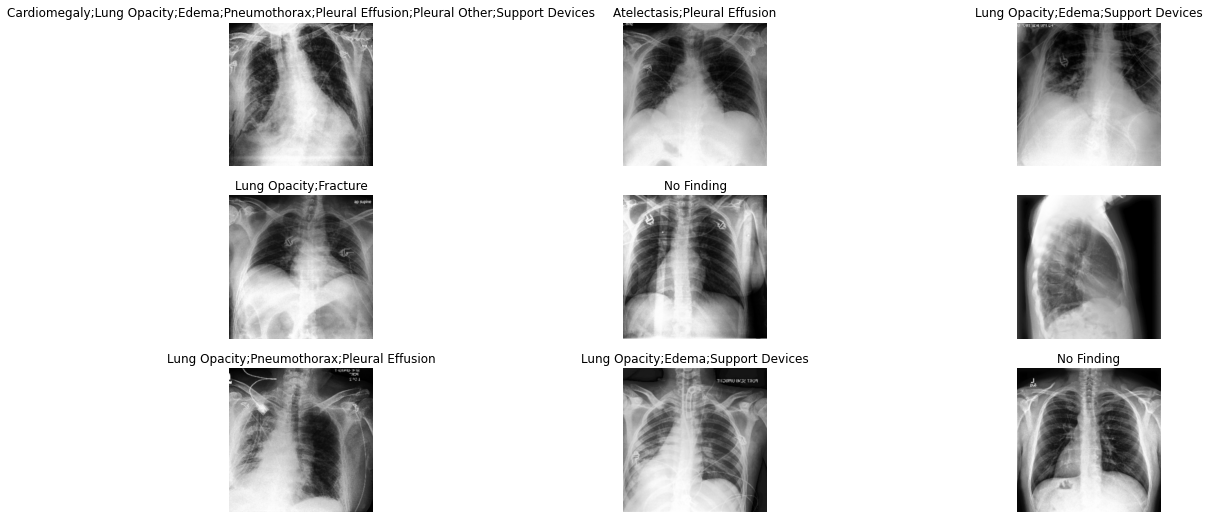

In [3]:
dls.show_batch(max_n=9, figsize=(20,9))

In [4]:
# First train on conditional probabilities
chexpert_learner_conditional = util.ChexpertLearner(dls, densenet121, n_out=len(labels), y_range=(0, 1),
                                        loss_func=util.BCEFlatHLCP(hierarchy_map=util.hierarchy_map),
                                        metrics=[partial(accuracy_multi, sigmoid=False),
                                                 RocAucMulti(sigmoid=False, average='weighted')])

lr_min/10: 0.02089296132326126, lr_steep: 0.033113110810518265, base_lr: 0.033113110810518265


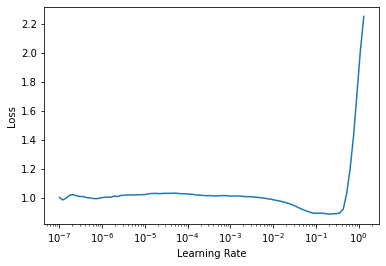

In [5]:
chexpert_learner_conditional.find_lr()

In [9]:
chexpert_learner_conditional.learn_model(use_saved=False , epochs=30)

epoch,train_loss,valid_loss,accuracy_multi,time


KeyboardInterrupt: 

In [ ]:
# Reload the data as it may have been modified for conditional probs
dls, labels = util.chexpert_data_loader()

In [ ]:
# Next train unconditionally for only transfer learning
chexpert_learner_unconditional = util.ChexpertLearner(dls, densenet121, n_out=len(labels), y_range=(0, 1),
                                        loss_func=BCELossFlat(),
                                        metrics=[partial(accuracy_multi, sigmoid=False),
                                                 RocAucMulti(sigmoid=False, average='weighted')])

In [ ]:
chexpert_learner_conditional.find_lr()

In [ ]:
chexpert_learner_unconditional.learn_model(use_saved=True, train_saved=True, epochs=30, freeze_epochs=30)

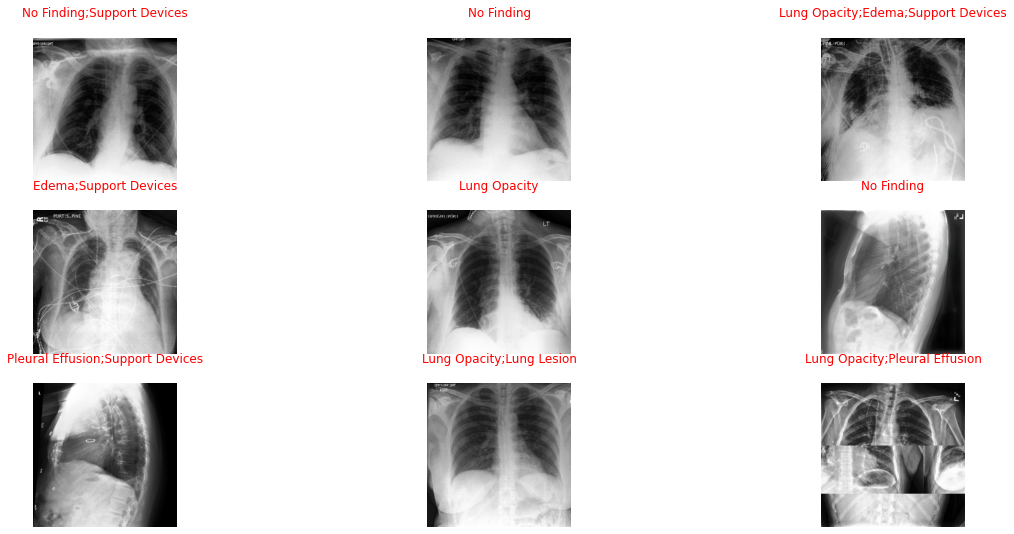

In [8]:
chexpert_learner = chexpert_learner_conditional
chexpert_learner.learn.show_results(figsize=(20,9))

In [ ]:
interp = Interpretation.from_learner(chexpert_learner.learn)
interp.plot_top_losses(9)

In [ ]:
cam.plot_cam(chexpert_learner.learn)

In [ ]:
doc(Learner.show_results)